# Pronóstico de precios en el sector inmobiliario en Bogotá 2021-1

13 de febrero de 2021


**Objetivo**: A partir de información disponible en [metro cuadrado](https://www.metrocuadrado.com) para Bogotá, se prentende pronosticar las siguientes variables:

* Precio
* Tipo de inmueble (casa y apartamento)
* Zona de ubicación

## Paquetes necesarios

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Descargando y limpiando los datos

Los datos se obtuvieron utilizando técnicas de web scraping de la página de metro cuadrado, se seleccionaron las características más relevantes de las casas y apartamentos y se almacenaron en un archivo .csv

In [5]:
datos = pd.read_csv('https://drive.google.com/uc?id=1jwQo5QLpdgfjqi17NV3t_nt6t8uuERgJ', index_col=0)
datos

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1,2,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,Casa,1018660600,173.0,3,4,1.0,Otros,NaN,NaN
4,Apartamento,1850000000,190.0,3,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
...,...,...,...,...,...,...,...,...,...
245,Apartamento,580000000,0.0,2,3,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
246,Casa,330000000,72.0,3,2,1.0,Norte,LA LIBERIA,LAS MARGARITAS
247,Casa,1200000000,400.0,3,4,3.0,Norte,EL CONTADOR,El Contador
248,Casa,642000000,191.0,4,4,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mtipoinmueble       10000 non-null  object 
 1   mvalorventa         10000 non-null  int64  
 2   marea               10000 non-null  float64
 3   mnrocuartos         9993 non-null   object 
 4   mnrobanos           10000 non-null  object 
 5   mnrogarajes         9945 non-null   float64
 6   mzona               9812 non-null   object 
 7   mbarrio             9945 non-null   object 
 8   mnombrecomunbarrio  9866 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 781.2+ KB


In [7]:
datos.describe()

,mvalorventa,marea,mnrogarajes
count,1.000000e+04,10000.000000,9945.000000
mean,2.666785e+09,170.825361,1.818602
std,3.509427e+10,284.303566,1.113742
min,1.100000e+06,0.000000,0.000000
25%,4.090000e+08,68.000000,1.000000
50%,6.900000e+08,117.000000,2.000000
75%,1.250000e+09,200.000000,2.000000
max,8.700000e+11,5808.000000,4.000000


Se observa un fuerte sesgo por derecha de la variable `mvalorventa`, la media es 2600 millones de pesos, mientras que la mediana es 690 millones de pesos. Además la desviación estándar es 35000 millones de pesos y la casa o aparatmento más costosa vale 870 millones de pesos. Con respecto a esto último puede ser un error de digitación o con la intención de aparecer en los primeros lugares de búsqueda. Con respecto a `marea` y `mnrogarajes` no se observa un fuerte sesgo.

In [8]:
datos.describe(include = np.object)

C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\3453149098.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datos.describe(include = np.object)


,mtipoinmueble,mnrocuartos,mnrobanos,mzona,mbarrio,mnombrecomunbarrio
count,10000,9993,10000,9812,9945,9866
unique,2,6,7,8,363,790
top,Apartamento,3,2,Norte,SAN JOSE DE BAVARIA,SAN JOSE DE BAVARIA
freq,7736,5043,3276,5105,419,221


Se oserva fuerte desbalance en la variable `mtipoinmueble` dado que más del 70% de valores son *Apartamento*. El número de cuartos más frecuente es 3, número de baños es 2, la zona y barrio más comunes son *Norte* y *San José de Bavaria*. 

Hay algo raro con `mnrocuartos` y `mnrobanos`, pandas lo tomo como texto cuando es evidente que son numéricas. Vamos a investigar un poco más lo que sucede.

In [9]:
datos.mnrocuartos.unique()

array(['3', '1', '2', '4', '5', '5+', nan], dtype=object)

In [10]:
datos.mnrobanos.unique()

array(['2', '4', '1', '3', '5', '0', '5+'], dtype=object)

En seguida investigamos cuales los registros con número de cuartos sin información (`NaN`)

In [11]:
filtro_cuartos_nulos = datos.mnrocuartos.isna()
datos[filtro_cuartos_nulos]

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
242,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico
202,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico
162,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico
122,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico
82,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico
42,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico
2,Apartamento,160000000,30.0,NaN,1,0.0,Norte,CHICO,El Chico


In [12]:
datos[datos.mnrocuartos=='5+']

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
215,Casa,700000000,250.0,5+,5+,0.0,Occidental,ONCE DE NOVIEMBRE,SANTA SOFIA
175,Casa,700000000,250.0,5+,5+,0.0,Occidental,ONCE DE NOVIEMBRE,SANTA SOFIA
135,Casa,700000000,250.0,5+,5+,0.0,Occidental,ONCE DE NOVIEMBRE,SANTA SOFIA
95,Casa,700000000,250.0,5+,5+,0.0,Occidental,ONCE DE NOVIEMBRE,SANTA SOFIA
55,Casa,700000000,250.0,5+,5+,0.0,Occidental,ONCE DE NOVIEMBRE,SANTA SOFIA
15,Casa,700000000,250.0,5+,5+,0.0,Occidental,ONCE DE NOVIEMBRE,SANTA SOFIA


Para filtrar por columnas usamos la siguiente sintaxis:

In [13]:
filtro_columnas = ['mtipoinmueble', 'mvalorventa']
datos[filtro_columnas]

,mtipoinmueble,mvalorventa
0,Apartamento,385000000
1,Apartamento,190810000
2,Apartamento,720000000
3,Casa,1018660600
4,Apartamento,1850000000
...,...,...
245,Apartamento,580000000
246,Casa,330000000
247,Casa,1200000000
248,Casa,642000000


### Eliminando valores repetidos

In [14]:
datos = datos.drop_duplicates()
datos

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1,2,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,Casa,1018660600,173.0,3,4,1.0,Otros,NaN,NaN
4,Apartamento,1850000000,190.0,3,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
...,...,...,...,...,...,...,...,...,...
245,Apartamento,580000000,0.0,2,3,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
246,Casa,330000000,72.0,3,2,1.0,Norte,LA LIBERIA,LAS MARGARITAS
247,Casa,1200000000,400.0,3,4,3.0,Norte,EL CONTADOR,El Contador
248,Casa,642000000,191.0,4,4,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


### Feature engineering

Vamos a alistar cada variable

In [15]:
def reemplacemas (fila):
  return '6' if fila == '5+' else fila

datos['mnrocuartos'] = datos.mnrocuartos.apply(reemplacemas).astype(float) # habian valores nulos y por eso se usa float
datos['mnrobanos'] = datos.mnrobanos.apply(reemplacemas).astype(int)

C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\3725763702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mnrocuartos'] = datos.mnrocuartos.apply(reemplacemas).astype(float) # habian valores nulos y por eso se usa float
C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\3725763702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mnrobanos'] = datos.mnrobanos.apply(reemplacemas).astype(int)


Vamos a graficar la variable `mvalorventa`

<Axes: >

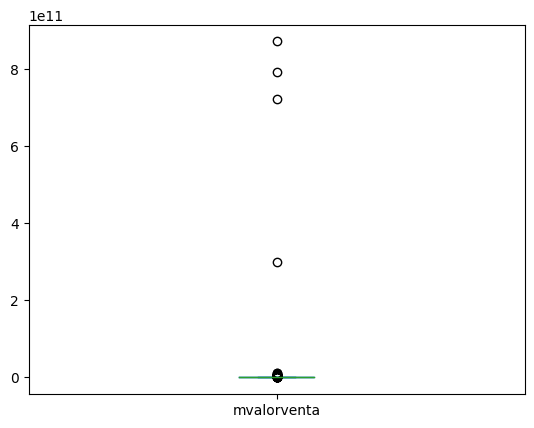

In [16]:
datos.mvalorventa.plot.box()

Dado que esta variable se distribuye de acuerdo a la ley de la potencia, se aplica logaritmo.

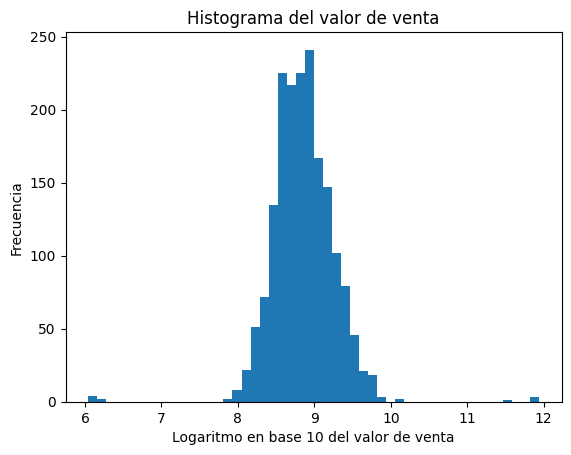

In [17]:
datos.mvalorventa.apply(np.log10).plot.hist(bins=50)
plt.xlabel('Logaritmo en base 10 del valor de venta')
plt.ylabel('Frecuencia')
plt.title('Histograma del valor de venta')
plt.show()

Se observa que la mayoría de casas y apartamentos se distribuye alrededor de miles de millones de pesos.

Dado el resultado anterior la variable se transformará mediante logaritmo en base 10

<Axes: ylabel='Frequency'>

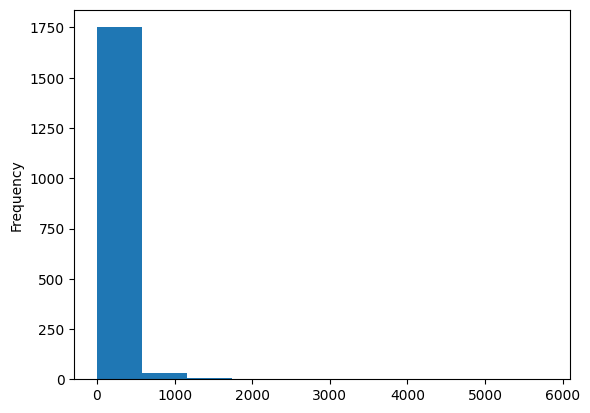

In [18]:
datos.marea.plot.hist()

Se observa sesgo en la variable `marea`, como se observa en seguida hay 174 inmuebles con área cero. Se deciden eliminar estos registros

In [19]:
datos[datos.marea == 0]

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
9,Apartamento,1900000000,0.0,4.0,4,4.0,Norte,SANTA BIBIANA,Chicó Navarra
24,Apartamento,290000000,0.0,3.0,2,1.0,Occidental,EL VERGEL OCCIDENTAL,ANDALUCIA
27,Apartamento,570000000,0.0,3.0,3,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
30,Apartamento,2650000000,0.0,3.0,4,4.0,Norte,LA CABRERA,La Cabrera
53,Apartamento,350000000,0.0,1.0,1,0.0,Chapinero,CHAPINERO CENTRAL,Chapinero Central
...,...,...,...,...,...,...,...,...,...
213,Apartamento,1150000000,0.0,3.0,5,2.0,Occidental,LA ESPERANZA NORTE,Salitre
214,Apartamento,340982000,0.0,1.0,1,2.0,Norte,LOS CEDRITOS,Cedritos
235,Apartamento,770000000,0.0,3.0,3,2.0,Noroccidente,EL PLAN,COLINA CAMPESTRE
238,Casa,410000000,0.0,3.0,3,2.0,Chapinero,TEUSAQUILLO,TEUSAQUILLO


In [20]:
datos = datos[datos.marea > 10]
datos

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3.0,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1.0,2,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3.0,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,Casa,1018660600,173.0,3.0,4,1.0,Otros,NaN,NaN
4,Apartamento,1850000000,190.0,3.0,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
...,...,...,...,...,...,...,...,...,...
244,Apartamento,106000000,42.0,2.0,1,0.0,Occidental,CAMPO ALEGRE,EL TINTAL
246,Casa,330000000,72.0,3.0,2,1.0,Norte,LA LIBERIA,LAS MARGARITAS
247,Casa,1200000000,400.0,3.0,4,3.0,Norte,EL CONTADOR,El Contador
248,Casa,642000000,191.0,4.0,4,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


<Axes: ylabel='Frequency'>

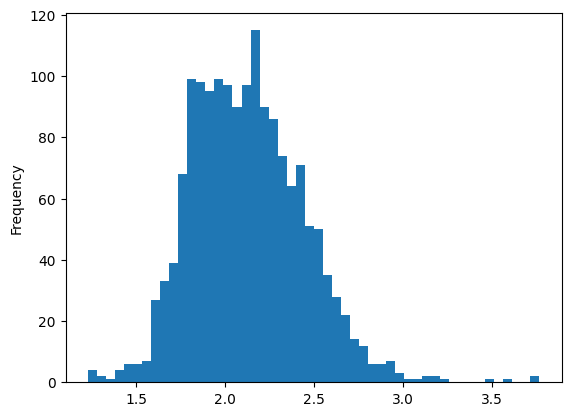

In [21]:
datos.marea.apply(np.log10).plot.hist(bins = 50)

Ahora aplicamos todas las transformaciones numéricas

In [22]:
datos['log_marea'] = datos.marea.apply(np.log10)
datos['log_mvalorventa'] = datos.mvalorventa.apply(np.log10)

C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\1059044830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['log_marea'] = datos.marea.apply(np.log10)
C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\1059044830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['log_mvalorventa'] = datos.mvalorventa.apply(np.log10)


## Análisis descriptivo bivariado

**ANTES**

<Axes: xlabel='marea', ylabel='mvalorventa'>

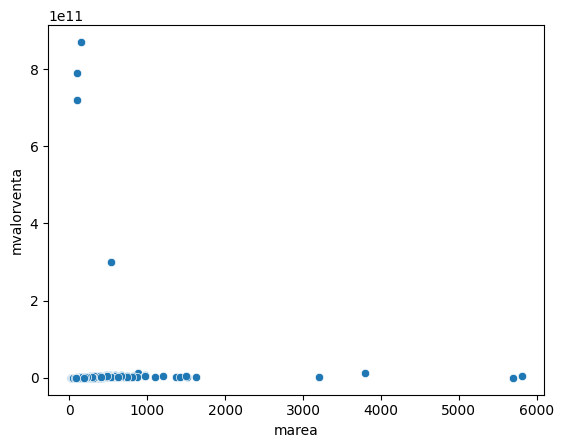

In [23]:
sns.scatterplot(data=datos, x='marea', y='mvalorventa')

**DESPUÉS**

<Axes: xlabel='log_marea', ylabel='log_mvalorventa'>

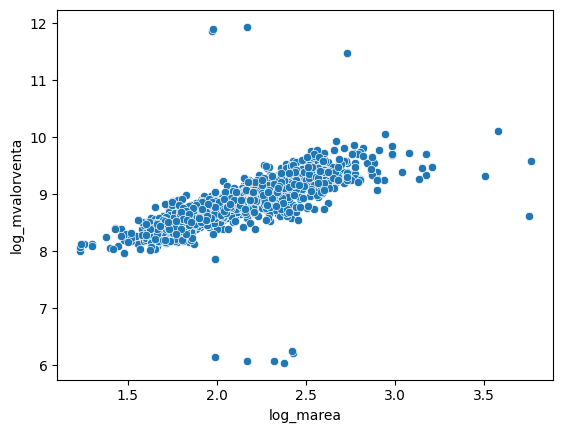

In [24]:
sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa')

Hay 10 inmuebles con precio atípico, se eliminan de la tabla de datos para una primer versión del modelo 

In [25]:
datos = datos[(datos.log_mvalorventa < 11) & (datos.log_mvalorventa > 7)]
datos

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio,log_marea,log_mvalorventa
0,Apartamento,385000000,100.0,3.0,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS,2.000000,8.585461
1,Apartamento,190810000,34.0,1.0,2,1.0,Norte,EL CODITO,EL REDIL,1.531479,8.280601
2,Apartamento,720000000,157.0,3.0,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza,2.195900,8.857332
3,Casa,1018660600,173.0,3.0,4,1.0,Otros,NaN,NaN,2.238046,9.008030
4,Apartamento,1850000000,190.0,3.0,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES,2.278754,9.267172
...,...,...,...,...,...,...,...,...,...,...,...
244,Apartamento,106000000,42.0,2.0,1,0.0,Occidental,CAMPO ALEGRE,EL TINTAL,1.623249,8.025306
246,Casa,330000000,72.0,3.0,2,1.0,Norte,LA LIBERIA,LAS MARGARITAS,1.857332,8.518514
247,Casa,1200000000,400.0,3.0,4,3.0,Norte,EL CONTADOR,El Contador,2.602060,9.079181
248,Casa,642000000,191.0,4.0,4,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira,2.281033,8.807535


<Axes: xlabel='log_marea', ylabel='log_mvalorventa'>

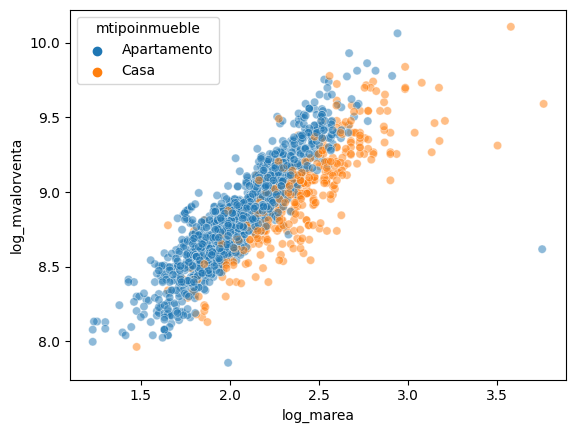

In [26]:
sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa', hue = 'mtipoinmueble', alpha=0.5)

## Análisis predictivo

### Modelo lineal usando ecuación normal

In [27]:
m = len(datos)
X = datos.log_marea.to_numpy().reshape((m,1))
y = datos.log_mvalorventa.to_numpy().reshape((m,1))

Como puede ver los datos parecen estar asociados linealmente, un buen modelo podría ser el siguiente:

$$\hat{y}^{(j)} = \theta_0 + \theta_1 x^{(j)}$$

Que es lo mismo a:

$$\left(\begin{array}{c}y^{(1)}\\y^{(2)}\\\vdots\\ y^{(m)}\end{array}\right) = \left(\begin{array}{cc}1 & x^{(1)}\\1 & x^{(2)}\\\vdots & \vdots\\ 1 & x^{(m)}\end{array}\right)\left(\begin{array}{c}\theta_0\\\theta_1\end{array}\right)$$

O en una manera más compacta:

$$\hat{y} = X\theta$$

Entonces, se conforma la matriz de entrada $X$, agregando unos en la primer columna y se encuentran los mejores parámetros del modelo que minimicen los errores cuadrados, mediante la ecuación normal.

$$\hat{\theta} = \left(X'X\right)^{-1}X'y$$


In [28]:
unos = np.ones((m,1))
X1 = np.c_[unos, X]
X1

array([[1.        , 2.        ],
       [1.        , 1.53147892],
       [1.        , 2.19589965],
       ...,
       [1.        , 2.60205999],
       [1.        , 2.28103337],
       [1.        , 1.89927319]])

In [29]:
a = np.dot(X1.T,X1)
b = np.linalg.inv(a)
c = np.dot(b,X1.T)
theta = np.dot(c,y)
theta

array([[6.84068979],
       [0.94901882]])

In [30]:
x1 = np.array([[1, 1.5]])
x2 = np.array([[1, 3.5]])
y_est1 = np.dot(x1,theta)
y_est2 = np.dot(x2,theta)
print('el valor estimado para un log_área =', x1, 'es:', y_est1)
print('el valor estimado para un log_área =', x2, 'es:', y_est2)

el valor estimado para un log_área = [[1.  1.5]] es: [[8.26421802]]
el valor estimado para un log_área = [[1.  3.5]] es: [[10.16225567]]


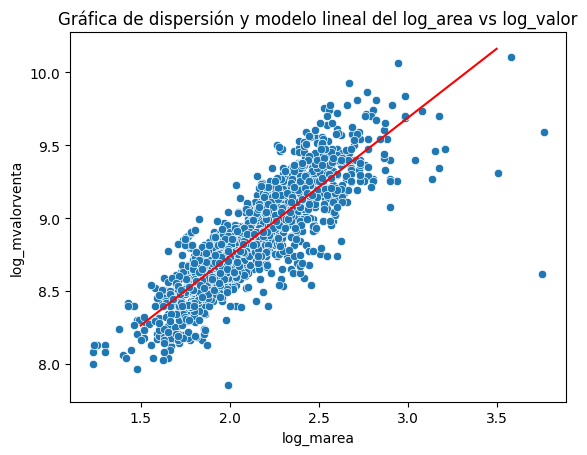

In [31]:
sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa')
plt.plot([x1[0][1], x2[0][1]], [y_est1[0][0], y_est2[0][0]], c='r')
plt.title('Gráfica de dispersión y modelo lineal del log_area vs log_valor')
plt.show()

El modelo lineal se puede interpretar de la siguiente manera:

$$y = b + mx$$

Donde 

$$y = \log(valor)$$
$$x = \log(area)$$

Reemplazando:

$$\log(valor) = b + m\log(area)$$

Aplicando potencia:
$$valor = 10^{b}\times area ^m$$

Reemplazando los parámetros encontrados se llega a:
$$valor=10^{6.8}\times area^{0.9}$$

### Modelo lineal usando gradiente descendente

## Regresión lineal usando gradiente descendente por lotes (batch gradient descendent)

El método define una función de costo, el cual se debe minimizar y para esto se utiliza su gradiente.

**1 .Función de Costo**

La función de costo permite evaluar el error de la función lineal. Este se define como:

$$J(\theta_0, \theta_1; X, y) = \frac{1}{2m}\sum_{j=1}^{m}(\hat{y}^{(j)}-y^{(j)})^2 = \frac{1}{2m}(\hat{y}-y)\cdot(\hat{y}-y)$$

**2. Gradiente de la función de costo**

Recordemos que el gradiente de una función es la dirección en la que se encuentra el mayor crecimiento de una función. Entonces, si queremos encontrar el mínimo de la función de costo, simplemente iteramos en pasos sucesivos hacia dirección de su gradiente negativo.

En la siguiente imagen se observa el proceso.

![](https://alykhantejani.github.io/images/gradient_descent_line_graph.gif)

Como el costo $J$ depende de $\theta_0$ y $\theta_1$, calculamos su gradiente $\nabla J = (\partial J/\partial\theta_0, \partial J/\partial\theta_1)$. Esto nos dirá la dirección hacia donde el costo aumenta y su valor negativo hacia donde disminuye. Luego, lo multiplicamos por un valor de paso $\alpha$ y actualizamos los valores $\theta_0$ y $\theta_1$,

$$\theta_0 := \theta_0 - \alpha\frac{\partial J}{\partial \theta_0}$$

$$\theta_1 := \theta_1 - \alpha\frac{\partial J}{\partial \theta_1}$$

Teniendo en cuenta la ecuación para $J$, al derivar se tiene que:

$$\theta_0 := \theta_0 - \alpha\frac{1}{m} \sum (\theta_0 + \theta_1x_i - y_i)$$

$$\theta_1 := \theta_1 - \alpha\frac{1}{m} \sum (\theta_0 + \theta_1x^{(j)} - y^{(j)})\cdot x^{(j)}$$

Utilizando la definición de $\hat{y}$, el par de ecuaciones finalmente queda así:

$$\theta_0 := \theta_0 - \frac{\alpha}{m} \sum (\hat{y}^{(j)}- y^{(j)})$$

$$\theta_1 := \theta_1 - \frac{\alpha}{m} (\hat{y}-y) \cdot X$$

Donde $\cdot$ representa el producto punto entre dos vectores.

O de una manera más compacta:

$$\hat{\theta}_{new} = \hat{\theta}_{old} -\frac{\alpha}{m}X(\hat{y}-y)$$


In [32]:
def Costo(X1, y, theta):
  m = len(y)
  y_est = np.dot(X1,theta)
  J = 1.0/(2*m)*np.dot((y_est-y).T, y_est-y)
  return J[0][0]

theta = np.array([[7],[4]])
Costo(X1, y, theta)

22.544438351846132

#### Taller
Realizar la gráfica del costo, manteniendo constante el intercepto en 7

In [33]:
def GradienteCosto(X1, y_est, y):
  m = len(y)
  DJ = 1.0/m * np.dot(X1.T, y_est - y)
  return DJ

y_est = np.dot(X1,theta)
GradienteCosto(X1, y_est, y)

array([[ 6.6443571],
       [14.4209725]])

#### Taller
La dirección anterior representa:


* [X] a. Donde decrece el costo
* [ ] b. Donde aumenta el costo
* [ ] c. Para llegar a monserrate
* [ ] d. Para llegar al mejor modelo lineal posible

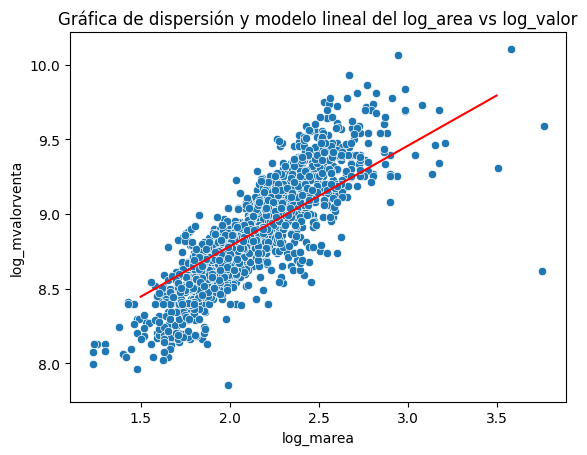

In [34]:
alpha = 0.01

theta = np.array([[9],[4]])

for i in range(0,200):
  y_est = np.dot(X1,theta)
  theta = theta - alpha * GradienteCosto(X1, y_est, y) # Actualiza theta
  # print(theta)


x1 = np.array([[1, 1.5]])
x2 = np.array([[1, 3.5]])
y_est1 = np.dot(x1,theta)
y_est2 = np.dot(x2,theta)

sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa')
plt.plot([x1[0][1], x2[0][1]], [y_est1[0][0], y_est2[0][0]], c='r')
plt.title('Gráfica de dispersión y modelo lineal del log_area vs log_valor')
plt.show()

## Solución del modelo de regresión lineal usando el paquete sklearn

el pronóstico de [[1.5]
 [3. ]] es: [8.24470866 9.74059896]
el intercepto del modelo es: [6.74881835]
la pendiente del modelo es: [0.9972602]


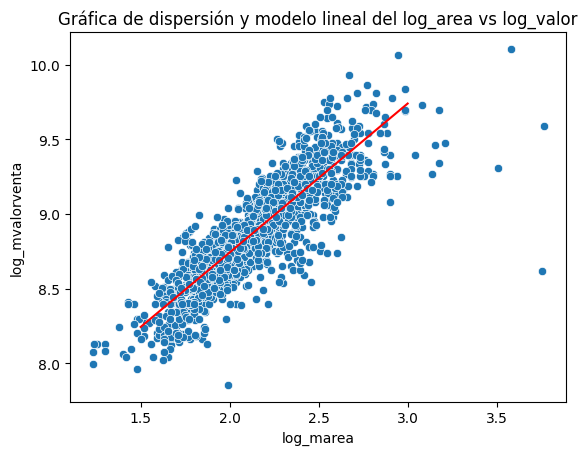

R^2 = 0.7289084720931323


In [35]:
from sklearn.linear_model import SGDRegressor # Stochastic Gradient Descent

# paso 1. Crear modelo
modelo_sgd = SGDRegressor(eta0 = 0.1, random_state=42) # eta0: alpha inicial

# paso 2. Ajustar modelo: Pasamos los datos de entrada y salida -> encuentra los parámetros del modelo
modelo_sgd.fit(X, y.ravel())

# paso 3. Pronosticar
x0 = np.array([[1.5], [3]]) # Se pronosotica una casa o apt de 10^1.5=32m^2 y 10^3=1000m^2
y_est0 = modelo_sgd.predict(x0) # La casa o apt de 32m2 vale 10^7.8 = 63millones y la de 1000m2 vale 10^10=18mil millones
print('el pronóstico de', x0, 'es:', y_est0) 

# paso 3b. Interpretacion
print('el intercepto del modelo es:', modelo_sgd.intercept_)
print('la pendiente del modelo es:', modelo_sgd.coef_)

# paso 4. Evaluar
sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa')
plt.plot(x0, y_est0, c='r')
plt.title('Gráfica de dispersión y modelo lineal del log_area vs log_valor')
plt.show()

print('R^2 =', modelo_sgd.score(X, y.ravel()))


## Regresión logística

Es un modelo lineal para clasificar una variable binaria. Ejemplo a partir del área, valor, numbanos, ... de un inmueble predecir si corresponde a una casa o apt.

In [36]:
# Alistamos la base

datos['mtipoinmueble'] = datos.mtipoinmueble.astype('category')
datos['mzona'] = datos.mzona.astype('category')
datos['mbarrio'] = datos.mbarrio.astype('category')
datos['mnombrecomunbarrio'] = datos.mnombrecomunbarrio.astype('category')

# Dummizamos la variable tipo inmueble
datos['mtipoinmueble_cod'] = datos.mtipoinmueble.cat.codes

datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 0 to 249
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   mtipoinmueble       1607 non-null   category
 1   mvalorventa         1607 non-null   int64   
 2   marea               1607 non-null   float64 
 3   mnrocuartos         1606 non-null   float64 
 4   mnrobanos           1607 non-null   int32   
 5   mnrogarajes         1598 non-null   float64 
 6   mzona               1572 non-null   category
 7   mbarrio             1594 non-null   category
 8   mnombrecomunbarrio  1584 non-null   category
 9   log_marea           1607 non-null   float64 
 10  log_mvalorventa     1607 non-null   float64 
 11  mtipoinmueble_cod   1607 non-null   int8    
dtypes: category(4), float64(5), int32(1), int64(1), int8(1)
memory usage: 138.2 KB


C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\3825347955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mtipoinmueble'] = datos.mtipoinmueble.astype('category')
C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\3825347955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mzona'] = datos.mzona.astype('category')
C:\Users\Naniss\AppData\Local\Temp\ipykernel_10020\3825347955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Ahora vamos a realizar un modelo de regresión logística cuya entrada es el área y salida el tipo de inmueble

<Axes: xlabel='log_marea', ylabel='mtipoinmueble_cod'>

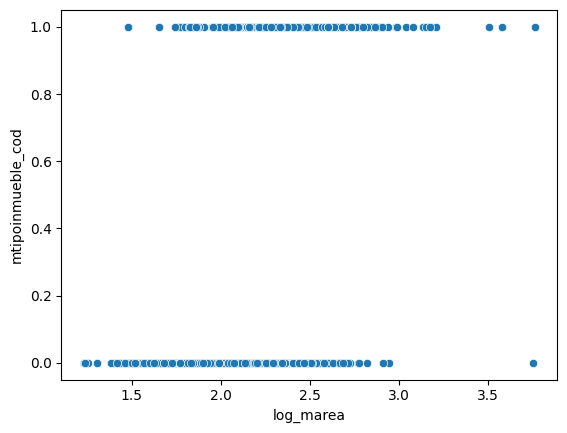

In [37]:
sns.scatterplot(data=datos, x='log_marea', y='mtipoinmueble_cod')

In [38]:
X = datos.log_marea.to_numpy().reshape(-1,1)
print(X.shape)

y = datos.mtipoinmueble_cod.to_numpy()
print(y.shape)

(1607, 1)
(1607,)


In [39]:
from sklearn.linear_model import LogisticRegression

# paso 1: Crear modelo
modelo_log = LogisticRegression(random_state=123)

# paso 2: Ajustar modelo
modelo_log.fit(X, y)

# paso 3: Pronosticamos la probabilidad que un inmueble cuya area es 10^3 = 1000m2 sea una casa
x0 = [[3]]

print(modelo_log.predict_proba(x0)) # la prob. que sea apt es 11% y casa 89%

# paso 4: Evaluar modelo

print(modelo_log.score(X,y)) # El 81% de inmuebles quedó bien clasificado

[[0.11434172 0.88565828]]
0.8102053515868077


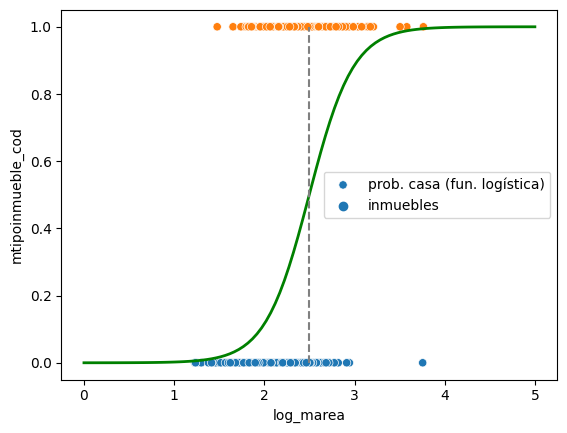

In [40]:
x0 = np.linspace(0,5,100).reshape(-1,1)
y0 = modelo_log.predict_proba(x0)

sns.scatterplot(data=datos, x='log_marea', y='mtipoinmueble_cod', hue='mtipoinmueble_cod')
plt.plot(x0, y0[:,1], 'g-', linewidth=2)
plt.legend(['prob. casa (fun. logística)','inmuebles'])
plt.vlines(x=2.5, ymin=0,ymax=1, linestyles='--', color='gray')

## Teoría Clasificación binomial

La clasificación binomial se realiza utilizando la función sigmoide. Su función de costo y gradiente se definen como:

**Función de costo**:

De manera similar a la función de costo para la regresión lineal, se define la función de costo para la regresión logística.
$$J = -\frac{1}{m} \sum_{i=1}^n [y\cdot \ln(\hat{y})+(1-y)\cdot \ln(1-\hat{y})]$$

Donde:

$$\hat{y} = \frac{1}{1+e^{-X\theta}}$$

es la función logística.

**Gradiente de la función de costo**

Recordemos que el gradiente nos dice hacia donde la función de costo debe dirigirse para disminuir para alcanzar el valor mínimo. Calculando el gradiente de la función de costo se obtiene:
$$DJ = -\frac{1}{m}X^T(y-\hat{y})$$

Observe que algo muy curioso es que el gradiente de la función de costo de la regresión lineal es el mismo que la regresión logística

In [41]:
# Funcion de costo usando sklearn
from sklearn.metrics import log_loss
log_loss(y,modelo_log.predict(X))

6.840892522514456

## Clasificación teniendo en cuenta el precio y el área

Ahora vamos a clasificar si un inmueble es casa o apt a partir de su precio y el área. En seguida se presenta una gráfica que relaciona las tres variables.

<Axes: xlabel='log_marea', ylabel='log_mvalorventa'>

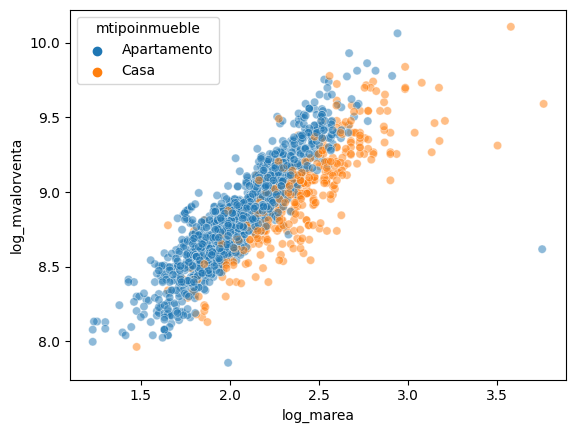

In [42]:
sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa', hue = 'mtipoinmueble', alpha=0.5)

Como se puede observar, un modelo lineal podría separar la región naranja de la azul. Para hacerlo vamos a definir la matriz de entrada $X$ que contiene el área y valor de venta y la variable objetivo $y$ con el tipo de inmueble.

In [43]:
X = datos[['log_marea', 'log_mvalorventa', 'mnrobanos']].to_numpy()
y = datos['mtipoinmueble_cod'].to_numpy()

Ahora creamos el modelo de regresión logística y lo ajustamos tal cual como se había realizado anteriormente.

In [44]:
# Paso 1: Se crea el modelo
modelo_log2 = LogisticRegression(random_state=42)

# Paso 2: Se ajusta el modelo
modelo_log2.fit(X, y)

LogisticRegression(random_state=42)

Ahora, se pronostican dos inmuebles: 
* El primero tiene $10^{1.5} = 31 m^2$ y cuesta $10^9 = mil\ millones\ de\ pesos$.

* El segundo tiene $10^{3.5} =3163m^2$ y cuesta $10^8 = 100\ millones\ de\ pesos$.

In [45]:
# Paso 3: Se pronostica algunos valores de prueba
x0 = [[2,np.log10(500000000),2],
      [3.5, 8, 5],
      [2, 10, 1]] 

print(modelo_log2.predict_proba(x0))

[[8.79698339e-01 1.20301661e-01]
 [1.98294307e-07 9.99999802e-01]
 [9.99850296e-01 1.49703703e-04]]


De acuerdo al resultado del modelo, el primero es un apt ($y=0$) y el segundo es una casa ($y=1$).

Ahora, vamos a evaluar para todos los posibles valores de área y precio y vamos a representar el resultado en un gráfico.

Ojo! si se quiere conocer la probabilidad más allá del pronóstico use `predict_proba`. Ejemplo:
```
x0 = [[1.5,8,0], [3.5, 8,1]] 
print(modelo_log2.predict_proba(x0))
```
Da como resultado:

```
[[9.55855711e-01 4.41442890e-02]
 [2.88678592e-07 9.99999711e-01]]
```

Lo cual quiere decir que para el primer inmueble la probabilidad que sea apt (y=0) es 0.956 = 95.6% y que sea casa (y=1) es 0.044 = 4.4% 

ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

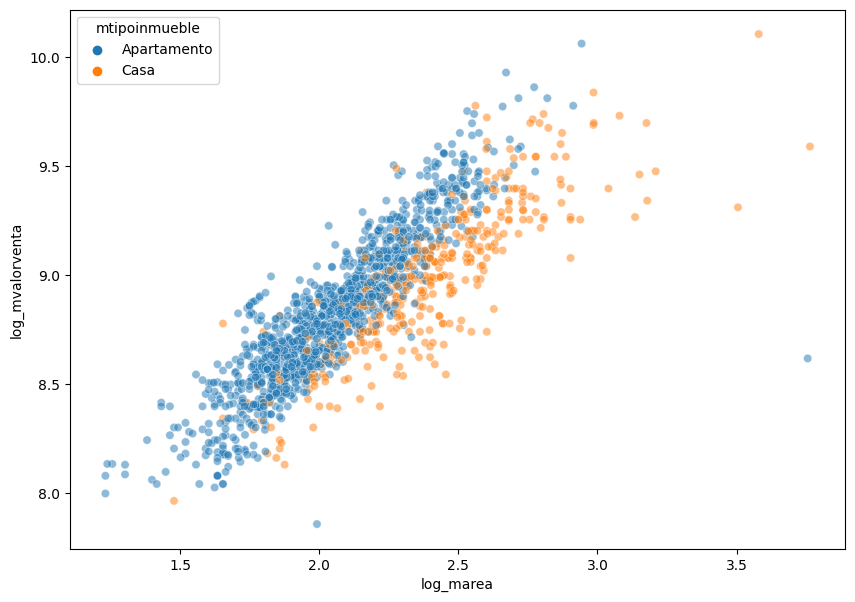

In [46]:
# Paso 3: Evaluación del modelo
plt.figure(figsize=(10, 7))
sns.scatterplot(data=datos, x='log_marea', y='log_mvalorventa', hue = 'mtipoinmueble', alpha=0.5)

# Creamos una grilla de valores que barran todos los valores posibles para area y precio
x0, x1 = np.meshgrid(
        np.linspace(1.5, 3, 100).reshape(-1, 1),
        np.linspace(8, 10, 100).reshape(-1, 1),
    )

# Construimos los valores de entrada X_new y su correspondiente salida
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = modelo_log2.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)

# Graficamos algunos valores de contorno (curvas de nivel) de la función sigmoide
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# Se seleccionan dos puntos para graficar la línea límite de decisión
left_right = np.array([1.8, 3])
boundary = -(modelo_log2.coef_[0][0] * left_right + modelo_log2.intercept_[0]) / modelo_log2.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3, 8.5, "Casa ($\hat y = 1$)", fontsize=20, color="orange", ha="center")
plt.text(1.8, 9.6, "Apartamento ($\hat y = 0$)", fontsize=20, color="b", ha="center")
plt.show()

Como era de esperarse, en general, las casas tienen mayor área y menor precio que un apartamento. Nuestro modelo se comporta como se esperaba. La línea segmentada es la frontera de decisión, allí la función sigmoide toma el valor de 0.5, para este caso, cualquier par de valores por debajo de ella será mayor a 0.5 y el pronóstico será (casa), por otro lado, cualquier par de valores por encima, lo clasificará como apartamento y será menor a 0.5.

![](https://miro.medium.com/max/572/1*adJ0PdMzRSViTbKPNOWIlA.png)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y,modelo_log2.predict(X))

4.4060168953904455